In [2]:
import numpy as np
import pandas as pd 
import cv2
import skimage
from skimage.filters import gaussian
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [27]:
stage1_train_labels = pd.read_csv('stage1_train_labels.csv')
stage1_train_labels.loc[0,'ImageId']

'00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552'

27

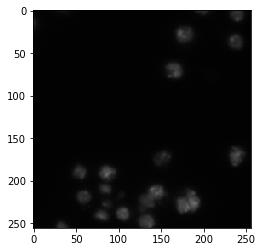

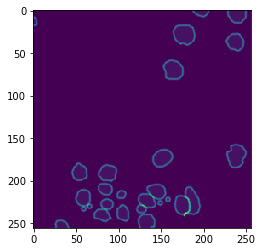

In [13]:
class image():
    def __init__(self, img_code, stage='stage1'):
        self.stage = stage
        self.img_code = img_code
        self.file_path = os.getcwd() + '\\' + stage + '_train\\' + img_code
        self.images_path = self.file_path + '\\images'
        self.mask_path = self.file_path + '\\masks'
        
        self.img = cv2.imread(self.images_path + '\\' + self.img_code + '.png')
        self._mask_file_names = self.get_mask_file_names()
        self.n_nuclei = len(self._mask_file_names)
        self.masks = self.get_masks()
        self.mask = np.sum(self.masks,axis=0)
        self.mask_with_outline = self.combine_masks_with_outline()
        
    def get_mask_file_names(self):
        mask_file_names = os.listdir(os.getcwd() + '\\stage1' + "_train\\" + self.img_code + "\\masks")
        return [mask_file_name for mask_file_name in mask_file_names if len(mask_file_name) > 0]
    
    def get_masks(self):
        masks = []
        for mask_file_name in self._mask_file_names:
            mask = cv2.imread(self.mask_path+'\\'+mask_file_name, cv2.IMREAD_GRAYSCALE)
            masks += [(mask > 0).astype(int)]
        return masks
    
    def combine_masks_with_outline(self):
        combined = self.mask.copy()
        for mask in self.masks:
            outline = (np.abs((gaussian(mask,sigma=1,preserve_range=True) - mask))*20).astype(int)
            combined += outline
        return combined
    
    
im1 = image(stage1_train_labels.loc[1,'ImageId'])
plt.imshow(im1.img)
plt.figure()
plt.imshow(im1.mask_with_outline)
im1.n_nuclei

In [ ]:
#mask_with_outline = stage1_train_labels['ImageId'].apply(image)

In [ ]:
df_mask_images = pd.DataFrame(columns=['ImageId','mask_image'])
df_mask_images.ImageId = stage1_train_labels.ImageId

for i in range(len(stage1_train_labels)):
    mask_path = os.getcwd() + '\\stage1' + "_train\\" + stage1_train_labels.loc[i,'ImageId'] + "\\masks"
    mask_files = os.listdir(os.getcwd() + '\\stage1' + "_train\\" + stage1_train_labels.loc[i,'ImageId'] + "\\masks")
    temp = cv2.imread(mask_path + "\\" + mask_files[0])
    for mask_file in mask_files[1:]:
        temp += cv2.imread(mask_path + "\\" + mask_file)
    df_mask_images.ImageId[i] = temp

In [146]:
plt.imshow(df_mask_images.ImageId[0])

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3
